In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset

df = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
df = df[df['Year'] == 2018]

# filter out countries with no data (NaN) or aggregates

df.dropna(subset=['Life expectancy at birth (historical)','GDP per capita' ], inplace=True)
df = df[df['Entity'] != 'World']
df = df[df['Entity'] != 'Americas']
df = df[df['Entity'] != 'North America']
df = df[df['Entity'] != 'South America']
df = df[df['Entity'] != 'Northern America']
df = df[df['Entity'] != 'Asia']
df = df[df['Entity'] != 'East Asia']
df = df[df['Entity'] != 'Eastern Europe']
df = df[df['Entity'] != 'Europe']
df = df[df['Entity'] != 'Latin America and the Caribbean']
df = df[df['Entity'] != 'Africa']
df = df[df['Entity'] != 'Oceania']

print('Length Dataframe:', len(df))


Length Dataframe: 165


## 1a: Write a Python program that draws a scatter plot of GDP per capita vs life expectancy.

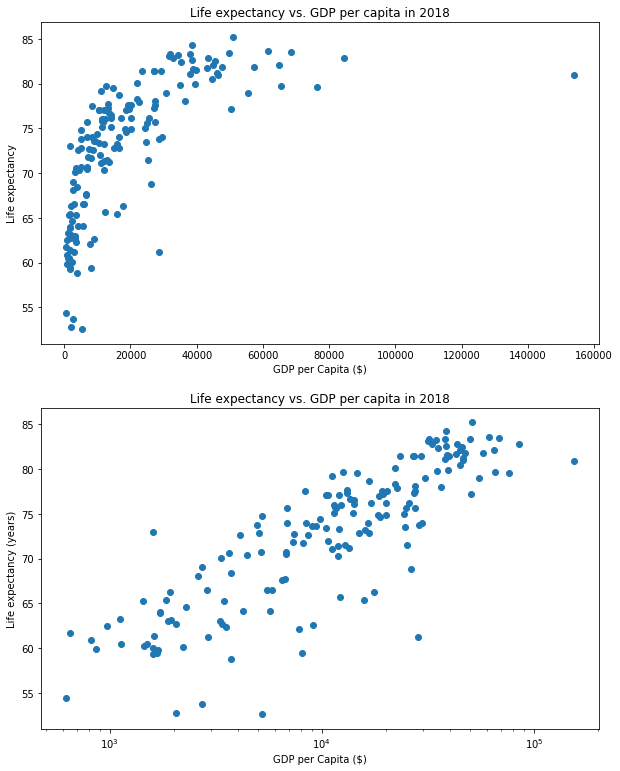

In [3]:
# Assignment 1a

plt.figure(figsize=(10,13))
plt.subplot(211)
plt.scatter(np.array(df['GDP per capita']), np.array(df['Life expectancy at birth (historical)']))
plt.title("Life expectancy vs. GDP per capita in 2018")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Life expectancy")

plt.subplot(212)
plt.scatter(np.array(df['GDP per capita']), np.array(df['Life expectancy at birth (historical)']))
plt.title("Life expectancy vs. GDP per capita in 2018")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Life expectancy (years)")
plt.xscale('log')


We filtered the data on year (we chose the most recent: 2018) and also removed the entities that were not countries

## 1b: Which countries have a life expectancy higher than one standard deviation above the mean?

In [4]:
df.describe()

,Year,Life expectancy at birth (historical),GDP per capita,Population (historical estimates)
count,165.0,165.000000,165.000000,1.650000e+02
mean,2018.0,72.632121,19053.786587,4.598704e+07
std,0.0,7.795691,20346.341739,1.575906e+08
min,2018.0,52.600000,623.488900,7.084000e+04
25%,2018.0,66.300000,4440.382000,4.270717e+06
50%,2018.0,74.000000,12165.795000,1.063328e+07
75%,2018.0,78.700000,27370.555000,3.239927e+07
max,2018.0,85.200000,153764.170000,1.417069e+09


In [5]:
mean_life = df['Life expectancy at birth (historical)'].describe(include='all').loc['mean']
std_life = df['Life expectancy at birth (historical)'].describe(include='all').loc['std']

print("The mean of life expectancy in 2018 is: {:.2f} years".format(mean_life))
print("The standard deviation of life expectancy in 2018 is: {:.2f} years".format(std_life))

long_life = df[df['Life expectancy at birth (historical)'] > mean_life+std_life]

print("")
print('The countries that have a life expectancy one standard deviation above the mean are:')
print(long_life['Entity'].to_string(index=False))

The mean of life expectancy in 2018 is: 72.63 years
The standard deviation of life expectancy in 2018 is: 7.80 years

The countries that have a life expectancy one standard deviation above the mean are:
Australia
       Austria
       Belgium
        Canada
        Cyprus
       Denmark
       Finland
        France
       Germany
        Greece
     Hong Kong
       Iceland
       Ireland
        Israel
         Italy
         Japan
    Luxembourg
         Malta
   Netherlands
   New Zealand
        Norway
      Portugal
         Qatar
     Singapore
      Slovenia
   South Korea
         Spain
        Sweden
   Switzerland
        Taiwan
United Kingdom


## 1c: Which countries have high life expectancy but have low GDP?

In [6]:
gdp = pd.read_csv("gross-domestic-product.csv")
gdp = gdp[gdp['Year'] == 2018]

df_all = pd.merge(df, gdp, how='left')
df_all.describe()

,Year,Life expectancy at birth (historical),GDP per capita,Population (historical estimates),GDP (constant 2015 US$)
count,165.0,165.000000,165.000000,1.650000e+02,1.620000e+02
mean,2018.0,72.632121,19053.786587,4.598704e+07,5.017378e+11
std,0.0,7.795691,20346.341739,1.575906e+08,1.943569e+12
min,2018.0,52.600000,623.488900,7.084000e+04,3.519714e+08
25%,2018.0,66.300000,4440.382000,4.270717e+06,1.482077e+10
50%,2018.0,74.000000,12165.795000,1.063328e+07,5.524018e+10
75%,2018.0,78.700000,27370.555000,3.239927e+07,2.986896e+11
max,2018.0,85.200000,153764.170000,1.417069e+09,1.955198e+13


In [7]:
high_life = df_all['Life expectancy at birth (historical)'].describe(include='all').loc['mean'] + df_all['Life expectancy at birth (historical)'].describe(include='all').loc['std']/4
low_gdp = df_all['GDP (constant 2015 US$)'].describe(include='all').loc['mean'] - df_all['GDP (constant 2015 US$)'].describe(include='all').loc['std']/4

print("High life expectancy: {:.2f} years".format(high_life))
print("Low GDP: {:.2f} USD".format(low_gdp))
print("")

df_all_lohi = df_all[df_all['Life expectancy at birth (historical)']>high_life]
df_all_lohi = df_all_lohi[df_all_lohi['GDP (constant 2015 US$)']<low_gdp]

print("Countries that have a high life expectancy but a low GDP are:")

df_all_lohi

High life expectancy: 74.58 years
Low GDP: 15845543367.70 USD

Countries that have a high life expectancy but a low GDP are:


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent,GDP (constant 2015 US$)
1,Albania,ALB,2018,79.2,11104.166,NaN,2877019.0,NaN,1.270246e+10
5,Armenia,ARM,2018,75.1,11454.425,NaN,2836563.0,NaN,1.195864e+10
11,Barbados,BRB,2018,77.1,11995.187,NaN,279702.0,NaN,4.826653e+09
25,Cape Verde,CPV,2018,75.7,6831.216,NaN,571209.0,NaN,1.812401e+09
93,Malta,MLT,2018,83.3,32028.912,NaN,491590.0,NaN,1.312908e+10
95,Mauritius,MUS,2018,74.9,20138.572,NaN,1295386.0,NaN,1.307798e+10
99,Montenegro,MNE,2018,77.2,19504.158,NaN,631459.0,NaN,4.591102e+09
111,North Macedonia,MKD,2018,77.3,13074.231,NaN,2113497.0,NaN,1.076455e+10
115,Palestine,PSE,2018,74.8,5207.757,NaN,4805549.0,NaN,1.561620e+10


Here we define high as being larger than the mean plus the standard deviation divided by 4. We defined low as the mean minus the standard deviation divided by 4.

## 1d: Does every strong economy (normally indicated by GDP) have high life expectancy?

In [8]:
strong_eco = df_all['GDP (constant 2015 US$)'].describe(include='all').loc['mean'] + df_all['GDP (constant 2015 US$)'].describe(include='all').loc['std']/4

strong_high = df_all[df_all['Life expectancy at birth (historical)']>high_life]
strong_high = strong_high[strong_high['GDP (constant 2015 US$)']>strong_eco]

print("Amount of high GDP countries with high life expectancy:", len(strong_high))

strong_high

Amount of high GDP countries with high life expectancy: 13


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent,GDP (constant 2015 US$)
6,Australia,AUS,2018,83.4,49830.800,NaN,2.497923e+07,NaN,1.460169e+12
18,Brazil,BRA,2018,75.1,14033.565,NaN,2.101666e+08,NaN,1.797737e+12
24,Canada,CAN,2018,82.1,44868.742,NaN,3.703526e+07,NaN,1.664870e+12
29,China,CHN,2018,77.7,13101.706,NaN,1.417069e+09,NaN,1.349342e+13
52,France,FRA,2018,82.6,38515.918,NaN,6.427781e+07,NaN,2.569458e+12
56,Germany,DEU,2018,81.2,46177.617,NaN,8.289670e+07,NaN,3.562734e+12
73,Italy,ITA,2018,83.2,34364.168,NaN,5.987743e+07,NaN,1.908934e+12
75,Japan,JPN,2018,84.3,38673.810,NaN,1.262559e+08,NaN,4.578913e+12
138,South Korea,KOR,2018,83.3,37927.610,NaN,5.167690e+07,NaN,1.601904e+12
139,Spain,ESP,2018,83.1,31496.520,NaN,4.679204e+07,NaN,1.297505e+12


In [9]:
low_life = df_all['Life expectancy at birth (historical)'].describe(include='all').loc['mean'] - df_all['Life expectancy at birth (historical)'].describe(include='all').loc['std']/4

strong_low = df_all[df_all['Life expectancy at birth (historical)']<low_life]
strong_low = strong_low[strong_low['GDP (constant 2015 US$)']>strong_eco]

print("Amount of high GDP countries with low life expectancy:", len(strong_low))

strong_low.head()

Amount of high GDP countries with low life expectancy: 1


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent,GDP (constant 2015 US$)
68,Indonesia,IDN,2018,70.3,11851.737,NaN,267066848.0,NaN,9.991786e+11


Here we used the same definition for high and low as before ($mean \pm std/4$). It can be seen that there exist 13 countries with high GDP and high life expectancy. However is also one country with high GDP, but low life expectancy. So not every country with high GDP also has a high life expectancy, however most do. The values for low and high GDP and life expectancy are:

In [10]:
print("High life expectancy: {:.2f} years".format(high_life))
print("Low life expectancy: {:.2f} years".format(low_life))
print("Good economy (GDP): {:.2f} USD".format(strong_eco))

High life expectancy: 74.58 years
Low life expectancy: 70.68 years
Good economy (GDP): 987630148127.41 USD


## 1e: what would happen if you use GDP per capita as an indicator of a strong economy?

In [11]:
strong_eco_c = df_all['GDP per capita'].describe(include='all').loc['mean'] + df_all['GDP per capita'].describe(include='all').loc['std']/4
print("Good economy (GDP per capita): {:.2f} USD".format(strong_eco_c))
print("")

strong_capita = df_all[df_all['Life expectancy at birth (historical)']>high_life]
strong_capita = strong_capita[strong_capita['GDP (constant 2015 US$)']>strong_eco_c]

print("Amount of high GDP/capita countries with high life expectancy:", len(strong_capita))

strong_capita.head()

Good economy (GDP per capita): 24140.37 USD

Amount of high GDP/capita countries with high life expectancy: 78


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent,GDP (constant 2015 US$)
1,Albania,ALB,2018,79.2,11104.166,NaN,2877019.0,NaN,1.270246e+10
2,Algeria,DZA,2018,76.1,14228.025,NaN,41927008.0,NaN,1.754261e+11
4,Argentina,ARG,2018,77.0,18556.383,NaN,44413592.0,NaN,5.831181e+11
5,Armenia,ARM,2018,75.1,11454.425,NaN,2836563.0,NaN,1.195864e+10
6,Australia,AUS,2018,83.4,49830.800,NaN,24979228.0,NaN,1.460169e+12


In [13]:
strong_capita_low = df_all[df_all['Life expectancy at birth (historical)']<low_life]
strong_capita_low = strong_capita_low[strong_capita_low['GDP (constant 2015 US$)']>strong_eco_c]

print("Amount of high GDP/capita countries with low life expectancy:", len(strong_capita_low))

strong_capita_low.head()

Amount of high GDP/capita countries with low life expectancy: 56


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent,GDP (constant 2015 US$)
0,Afghanistan,AFG,2018,63.1,1934.5550,NaN,36686788.0,NaN,2.032349e+10
3,Angola,AGO,2018,62.1,7771.4420,NaN,31273538.0,NaN,1.107645e+11
14,Benin,BEN,2018,60.1,2220.1765,NaN,11940688.0,NaN,1.326881e+10
15,Bolivia,BOL,2018,67.7,6695.7744,NaN,11606906.0,NaN,3.736496e+10
17,Botswana,BWA,2018,65.4,15842.1300,NaN,2451411.0,NaN,1.571783e+10


Since GDP depends on the size of the country as well as on the size of the economy, it is not a good indicator as a strong economy. We see that by using GDP per capita, a lot more countries satisfy the requirement for good economy. We also see that there is a similar amount of countries with a high GDP per capita with low expectancy as the ones with high life expectancy. However it is still less.